In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets


In [6]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Task 1: Exploratory Data Analysis (EDA)


In [17]:
def perform_eda():
    print("\n--- Customers Dataset ---\n")
    print(customers.info())
    print(customers.describe())
    print(customers.head())

    print("\n--- Products Dataset ---\n")
    print(products.info())
    print(products.describe())
    print(products.head())

    print("\n--- Transactions Dataset ---\n")
    print(transactions.info())
    print(transactions.describe())
    print(transactions.head())
    
   # Insight 1: Top-Selling Products
    top_products = transactions.groupby('ProductID').TotalValue.sum().nlargest(5)
    print("\nTop-Selling Products:\n", top_products)

    # Insight 2: Customer Regions Analysis
    region_sales = transactions.merge(customers, on='CustomerID').groupby('Region').TotalValue.sum().nlargest(5)
    print("\nSales by Region:\n", region_sales)

    # Insight 3: Daily Sales Trends
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date).TotalValue.sum()
    print("\nDaily Sales Trend:\n", daily_sales)
    daily_sales.plot(title="Daily Sales Trend", xlabel="Date", ylabel="Total Sales")
    plt.show()

    # Insight 4: Customer Lifetime Value (CLV)
    customer_clv = transactions.groupby('CustomerID').TotalValue.sum()
    top_customers = customer_clv.nlargest(10)
    print("\nTop 10 Customers by Lifetime Value:\n", top_customers)

    # Insight 5: Product Category Performance
    product_sales = transactions.merge(products, on='ProductID').groupby('Category').TotalValue.sum().nlargest(5)
    print("\nSales by Product Category:\n", product_sales)
    product_sales.plot(kind='bar', title="Product Category Sales", xlabel="Category", ylabel="Total Sales", color='skyblue')
    plt.show()



--- Customers Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Ka

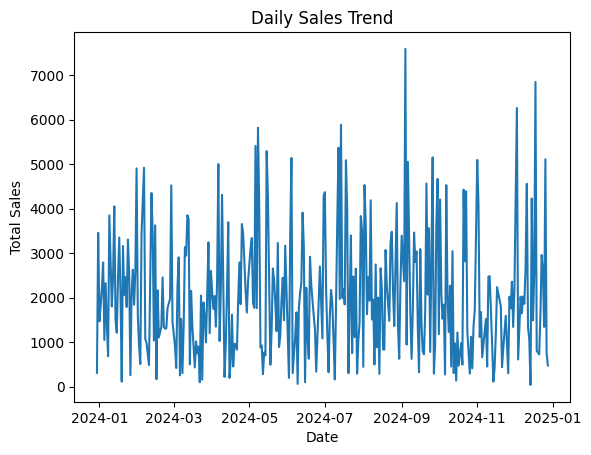


Top 10 Customers by Lifetime Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Sales by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


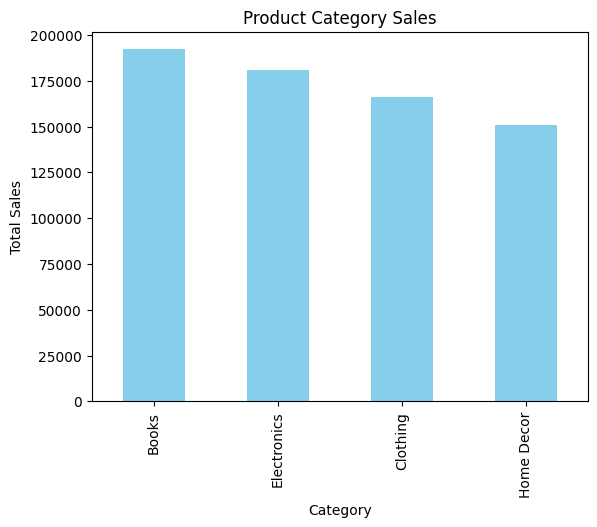

In [18]:
perform_eda()